In [61]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import reedsolo

# Input data
data = "Kookmin"
# data = "WicomAi"
print(f"data: {data}")
character_count = len(data)
print(f"Length of data: {character_count}")

# Step 1: Convert string to bits
bits = list(itertools.chain.from_iterable([list(map(int, f"{ord(c):08b}")) for c in data]))
print(f"Transmitted bits: {bits}")
print(f"Length of transmitted bits: {len(bits)}")

# Convert bits to binary string
binary_str = ''.join(map(str, bits))
print(f"Transmitted Signal: {list(binary_str)}")
print(f"Length of binary string: {len(binary_str)}")

# Convert binary data to bytes
byte_array = bytearray([int(binary_str[i:i+8], 2) for i in range(0, len(binary_str), 8)])
data_bytes = bytes(byte_array)
# Initialize the Reed-Solomon codec
n = 15 #total data + parity
k = 11 #total data


# n = 255 #total data + parity
# k = 245 #total data


# Initialize Reed-Solomon codec
rs = reedsolo.RSCodec(n - k)  # RS(15,11) allows 2 bit error correction
encoded_data = rs.encode(data_bytes)

# Convert the encoded bytes back to binary
encoded_binary = ''.join(f'{byte:08b}' for byte in encoded_data)
print(f"FEC Encoded binary data: {encoded_binary}")
print(f"Length of FEC Encoded binary data: {len(encoded_binary)}")

# Convert the binary string to a list of integers
binary_list = [int(bit) for bit in encoded_binary]
print(f"Binary list: {binary_list}")
print(f"Length of binary list: {len(binary_list)}")

# QAM-4 Modulation
M = 4  # QAM-4 (QPSK)
bits_per_symbol = int(np.log2(M))
pad_length = (bits_per_symbol - len(binary_list) % bits_per_symbol) % bits_per_symbol
padded_bits = np.append(binary_list, [0] * pad_length)
print(f"Padded bits: {padded_bits}")
print(f"Length of padded bits: {len(padded_bits)}")

mapping = {'00': 1+1j, '01': 1-1j, '11': -1-1j, '10': -1+1j}
symbols = [mapping[''.join(str(int(bit)) for bit in padded_bits[i:i+bits_per_symbol])] for i in range(0, len(padded_bits), bits_per_symbol)]
qam_symbols = np.array(symbols)
print(f"QAM-4 Symbols: {qam_symbols}")
print(f"Length of QAM symbols: {len(qam_symbols)}")

data: Kookmin
Length of data: 7
Transmitted bits: [0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0]
Length of transmitted bits: 56
Transmitted Signal: ['0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0']
Length of binary string: 56
FEC Encoded binary data: 0100101101101111011011110110101101101101011010010110111010101001111000000011101100111000
Length of FEC Encoded binary data: 88
Binary list: [0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 

In [62]:
# Hermitian symmetry and OFDM creation (tanpa fungsi)
# num_subcarriers = 16
symbols_per_ofdm = 7
num_ofdm_symbols = len(qam_symbols) // symbols_per_ofdm
ofdm_symbols = []
hermitian_symmetric_all = []
for i in range(num_ofdm_symbols):
    start_idx = i * symbols_per_ofdm
    end_idx = start_idx + symbols_per_ofdm
    qam_chunk = qam_symbols[start_idx:end_idx]

    N = 16
    hermitian_symmetric = np.zeros(N, dtype=complex)
    hermitian_symmetric[1:8] = qam_chunk[0:7]
    hermitian_symmetric[8] = 0
    hermitian_symmetric[9] = np.conj(qam_chunk[6])
    hermitian_symmetric[10:15] = np.conj(qam_chunk[1:6])[::-1]
    hermitian_symmetric[15] = np.conj(qam_chunk[0])
    
    
    hermitian_symmetric_all.append(hermitian_symmetric)

    time_domain_ofdm = np.fft.ifft(hermitian_symmetric)
    ofdm_symbols.append(time_domain_ofdm)

print ("hermitian_symmetric", hermitian_symmetric_all)
ofdm_symbols = np.array(ofdm_symbols)


hermitian_symmetric [array([ 0.+0.j,  1.-1.j,  1.+1.j, -1.+1.j, -1.-1.j,  1.-1.j, -1.+1.j,
       -1.-1.j,  0.+0.j, -1.+1.j, -1.-1.j,  1.+1.j, -1.+1.j, -1.-1.j,
        1.-1.j,  1.+1.j]), array([ 0.+0.j, -1.-1.j,  1.-1.j, -1.+1.j, -1.-1.j, -1.-1.j,  1.-1.j,
       -1.+1.j,  0.+0.j, -1.-1.j,  1.+1.j, -1.+1.j, -1.+1.j, -1.-1.j,
        1.+1.j, -1.+1.j]), array([ 0.+0.j, -1.+1.j, -1.-1.j,  1.-1.j, -1.+1.j, -1.-1.j,  1.-1.j,
        1.-1.j,  0.+0.j,  1.+1.j,  1.+1.j, -1.+1.j, -1.-1.j,  1.+1.j,
       -1.+1.j, -1.-1.j]), array([ 0.+0.j, -1.+1.j, -1.+1.j,  1.-1.j,  1.-1.j, -1.+1.j, -1.-1.j,
       -1.+1.j,  0.+0.j, -1.-1.j, -1.+1.j, -1.-1.j,  1.+1.j,  1.+1.j,
       -1.-1.j, -1.-1.j]), array([ 0.+0.j, -1.+1.j, -1.+1.j, -1.+1.j,  1.-1.j, -1.-1.j, -1.+1.j,
        1.+1.j,  0.+0.j,  1.-1.j, -1.-1.j, -1.+1.j,  1.+1.j, -1.-1.j,
       -1.-1.j, -1.-1.j]), array([ 0.+0.j,  1.+1.j,  1.+1.j, -1.-1.j, -1.+1.j, -1.-1.j,  1.+1.j,
       -1.-1.j,  0.+0.j, -1.+1.j,  1.-1.j, -1.+1.j, -1.-1.j, -1.+1.j,
    

In [63]:

tx_signal_real = np.concatenate([ofdm.real for ofdm in ofdm_symbols])
tx_signal_imag = np.concatenate([ofdm.imag for ofdm in ofdm_symbols])
print(f"Length of OFDM symbols (real part): {len(tx_signal_real)}")
print(f"Length of OFDM symbols (imaginary part): {len(tx_signal_imag)}")

Length of OFDM symbols (real part): 96
Length of OFDM symbols (imaginary part): 96


In [64]:
print("Time-Domain OFDM Symbols:")
print(ofdm_symbols)

Time-Domain OFDM Symbols:
[[-0.125     +0.j  0.35596988+0.j -0.0517767 +0.j  0.07905723+0.j
   0.125     +0.j  0.02932914+0.j -0.0517767 +0.j  0.18892522+0.j
  -0.125     +0.j -0.10596988+0.j  0.3017767 +0.j -1.03616401+0.j
  -0.375     +0.j  0.22067086+0.j  0.3017767 +0.j  0.26818156+0.j]
 [-0.375     +0.j  0.3017767 +0.j  0.125     +0.j  0.0517767 +0.j
   0.125     +0.j -0.0517767 +0.j  0.125     +0.j -0.3017767 +0.j
   0.625     +0.j  0.3017767 +0.j  0.125     +0.j  0.0517767 +0.j
  -0.875     +0.j -0.0517767 +0.j  0.125     +0.j -0.3017767 +0.j]
 [-0.125     +0.j -0.02932914+0.j -0.0517767 +0.j  0.05624179+0.j
  -0.375     +0.j  0.10596988+0.j -0.0517767 +0.j  0.13771552+0.j
  -0.125     +0.j -0.22067086+0.j  0.3017767 +0.j  0.90086499+0.j
   0.125     +0.j -0.35596988+0.j  0.3017767 +0.j -0.5948223 +0.j]
 [-0.375     +0.j  0.125     +0.j -0.375     +0.j -0.58693977+0.j
   0.125     +0.j  0.125     +0.j  0.47855339+0.j -0.31634172+0.j
   0.125     +0.j  0.125     +0.j -0.375     +0

In [65]:
tx_signal_combined_real = np.concatenate([ofdm.real for ofdm in ofdm_symbols])
tx_signal_combined_imag = np.concatenate([ofdm.imag for ofdm in ofdm_symbols])

print("combine real of ofdm", tx_signal_combined_real)

combine real of ofdm [-0.125       0.35596988 -0.0517767   0.07905723  0.125       0.02932914
 -0.0517767   0.18892522 -0.125      -0.10596988  0.3017767  -1.03616401
 -0.375       0.22067086  0.3017767   0.26818156 -0.375       0.3017767
  0.125       0.0517767   0.125      -0.0517767   0.125      -0.3017767
  0.625       0.3017767   0.125       0.0517767  -0.875      -0.0517767
  0.125      -0.3017767  -0.125      -0.02932914 -0.0517767   0.05624179
 -0.375       0.10596988 -0.0517767   0.13771552 -0.125      -0.22067086
  0.3017767   0.90086499  0.125      -0.35596988  0.3017767  -0.5948223
 -0.375       0.125      -0.375      -0.58693977  0.125       0.125
  0.47855339 -0.31634172  0.125       0.125      -0.375       0.33693977
  0.625       0.125      -0.22855339  0.06634172 -0.375      -0.37841744
 -0.125      -0.62841744  0.625       0.16647767 -0.47855339  0.18707572
  0.125       0.27486405 -0.125       0.02486405  0.125       0.43707572
  0.22855339 -0.08352233 -0.125       0

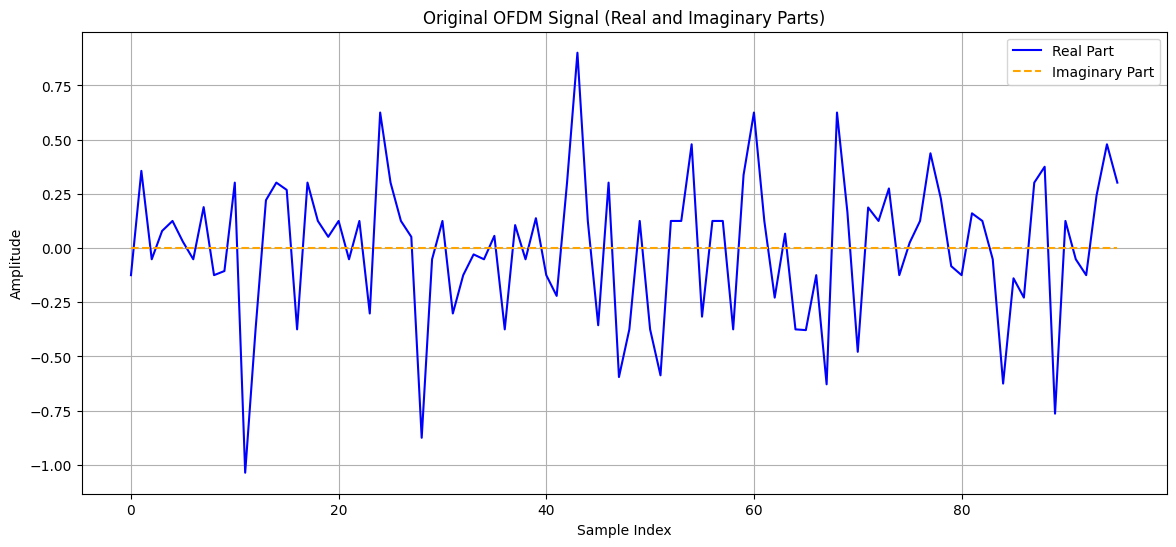

In [66]:


# Plot original OFDM symbols
plt.figure(figsize=(14, 6))
plt.plot(tx_signal_combined_real, label='Real Part', color='blue')
plt.plot(tx_signal_combined_imag, label='Imaginary Part', linestyle='--', color='orange')
plt.title('Original OFDM Signal (Real and Imaginary Parts)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In [67]:


# Clipping function (tanpa fungsi)
alpha = 1.5

# alpha = 0.5
percentile_value = 85
sigma_x_t = np.std(tx_signal_combined_real)
b = alpha * sigma_x_t
biased_signal = (tx_signal_combined_real + b)*20
A = np.percentile(biased_signal, percentile_value)
clipped_signal = np.clip(biased_signal, 0, A)
clipped_signal_example = np.array([clipped_signal])
# transmitted_signal = clipped_signal_example + 200

print("transmitted signal clipped", clipped_signal_example)


transmitted signal clipped [[ 7.42156742 15.95710132  8.88603351 11.50271209 12.42156742 10.50815025
   8.88603351 13.70007189  7.42156742  7.80216975 15.95710132  0.
   2.42156742 14.33498458 15.95710132 15.28519857  2.42156742 15.95710132
  12.42156742 10.95710132 12.42156742  8.88603351 12.42156742  3.88603351
  15.95710132 15.95710132 12.42156742 10.95710132  0.          8.88603351
  12.42156742  3.88603351  7.42156742  9.33498458  8.88603351 11.04640324
   2.42156742 12.04096508  8.88603351 12.67587777  7.42156742  5.50815025
  15.95710132 15.95710132 12.42156742  2.80216975 15.95710132  0.
   2.42156742 12.42156742  2.42156742  0.         12.42156742 12.42156742
  15.95710132  3.59473309 12.42156742 12.42156742  2.42156742 15.95710132
  15.95710132 12.42156742  5.3504996  11.24840174  2.42156742  2.35321869
   7.42156742  0.         15.95710132 13.25112082  0.3504996  13.66308182
  12.42156742 15.41884833  7.42156742 10.41884833 12.42156742 15.95710132
  14.49263523  8.25112082  

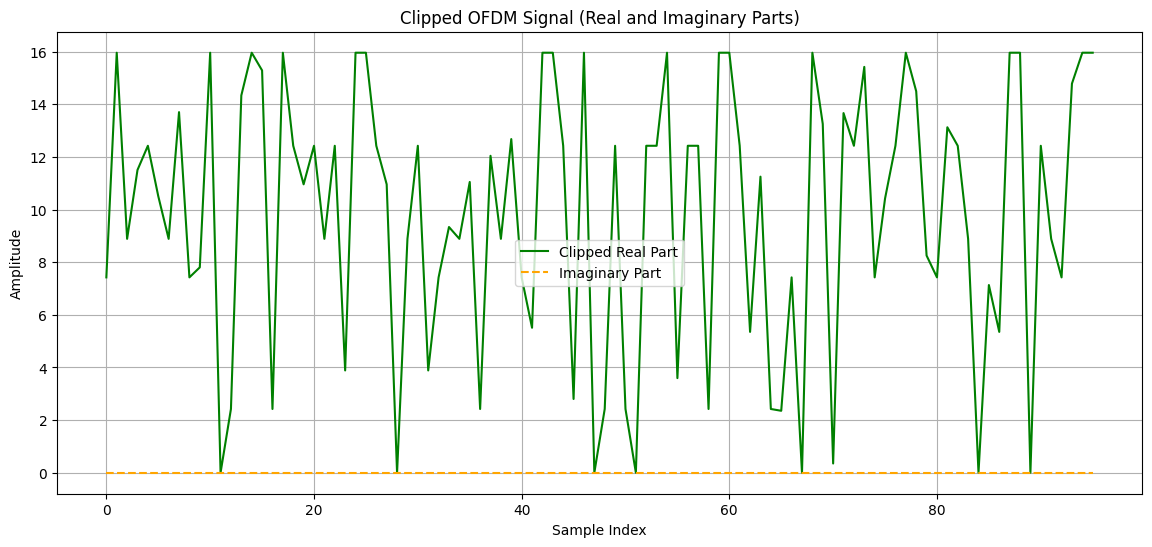

In [68]:


# Plot clipped signal
plt.figure(figsize=(14, 6))
plt.plot(clipped_signal_example[0], label='Clipped Real Part', color='green')
plt.plot(tx_signal_combined_imag, label='Imaginary Part', linestyle='--', color='orange')
plt.title('Clipped OFDM Signal (Real and Imaginary Parts)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()



In [69]:
# Normalizing and mapping signal 
normalized_signal = np.round(clipped_signal_example).astype(int).reshape(-1)
print(f"Normalized Signal = {normalized_signal}")

Normalized Signal = [ 7 16  9 12 12 11  9 14  7  8 16  0  2 14 16 15  2 16 12 11 12  9 12  4
 16 16 12 11  0  9 12  4  7  9  9 11  2 12  9 13  7  6 16 16 12  3 16  0
  2 12  2  0 12 12 16  4 12 12  2 16 16 12  5 11  2  2  7  0 16 13  0 14
 12 15  7 10 12 16 14  8  7 13 12  9  0  7  5 16 16  0 12  9  7 15 16 16]


In [70]:
print(f"Normalized Signal Length: {len(normalized_signal)}")

formatted_list = ', '.join(map(str, normalized_signal))

min_value = np.min(normalized_signal)
max_value = np.max(normalized_signal)
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

print(f"Normalized Signal = [{formatted_list}]")

Normalized Signal Length: 96
Minimum value: 0
Maximum value: 16
Normalized Signal = [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9, 11, 2, 12, 9, 13, 7, 6, 16, 16, 12, 3, 16, 0, 2, 12, 2, 0, 12, 12, 16, 4, 12, 12, 2, 16, 16, 12, 5, 11, 2, 2, 7, 0, 16, 13, 0, 14, 12, 15, 7, 10, 12, 16, 14, 8, 7, 13, 12, 9, 0, 7, 5, 16, 16, 0, 12, 9, 7, 15, 16, 16]


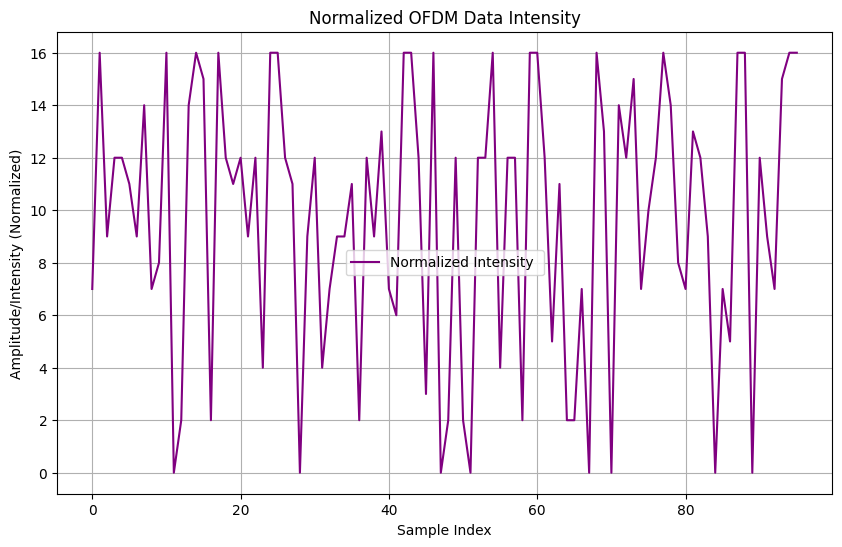

In [71]:


# Plot normalized data
plt.figure(figsize=(10, 6))
plt.plot(normalized_signal, label='Normalized Intensity ', color='purple')
plt.title('Normalized OFDM Data Intensity')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude/Intensity (Normalized)')
plt.grid(True)
plt.legend()
plt.show()

In [72]:
Data_ofdm = formatted_list
Data_ofdm = list(map(int, Data_ofdm.split(',')))  # Konversi menjadi list of int
print ("\nPure OFDM for adding 0:", Data_ofdm)
print ("reconstructed_OFDM = ", Data_ofdm)


Pure OFDM for adding 0: [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9, 11, 2, 12, 9, 13, 7, 6, 16, 16, 12, 3, 16, 0, 2, 12, 2, 0, 12, 12, 16, 4, 12, 12, 2, 16, 16, 12, 5, 11, 2, 2, 7, 0, 16, 13, 0, 14, 12, 15, 7, 10, 12, 16, 14, 8, 7, 13, 12, 9, 0, 7, 5, 16, 16, 0, 12, 9, 7, 15, 16, 16]
reconstructed_OFDM =  [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9, 11, 2, 12, 9, 13, 7, 6, 16, 16, 12, 3, 16, 0, 2, 12, 2, 0, 12, 12, 16, 4, 12, 12, 2, 16, 16, 12, 5, 11, 2, 2, 7, 0, 16, 13, 0, 14, 12, 15, 7, 10, 12, 16, 14, 8, 7, 13, 12, 9, 0, 7, 5, 16, 16, 0, 12, 9, 7, 15, 16, 16]


In [73]:

min_value = np.min(Data_ofdm)
max_value = np.max(Data_ofdm)
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}\n")

print("Pure OFDM     = ", Data_ofdm)
print(f"Normalized Signal Length Before: {len(Data_ofdm)}")


Minimum value: 0
Maximum value: 16

Pure OFDM     =  [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9, 11, 2, 12, 9, 13, 7, 6, 16, 16, 12, 3, 16, 0, 2, 12, 2, 0, 12, 12, 16, 4, 12, 12, 2, 16, 16, 12, 5, 11, 2, 2, 7, 0, 16, 13, 0, 14, 12, 15, 7, 10, 12, 16, 14, 8, 7, 13, 12, 9, 0, 7, 5, 16, 16, 0, 12, 9, 7, 15, 16, 16]
Normalized Signal Length Before: 96


In [74]:
#kode diupdate ---- 01232025
import numpy as np

# Input data
input_data = "4"
print("input data: Drone number", input_data)

# Convert text to binary
bit_stream = ''.join(format(ord(char), '08b') for char in input_data)
print("Bit Stream:", bit_stream)


# Generate OOK signal
OOK_signal = [1 if bit == '1' else 0 for bit in bit_stream]
print("OOK Signal:", OOK_signal)


input data: Drone number 4
Bit Stream: 00110100
OOK Signal: [0, 0, 1, 1, 0, 1, 0, 0]


In [75]:
# Block size calculation
block_size = len(Data_ofdm) // len(OOK_signal)
modified_OFDM = []

for i, bit in enumerate(OOK_signal):
    # Extract the current block
    block = Data_ofdm[i * block_size:(i + 1) * block_size]
    
    # Modify the block based on the OOK bit
    if bit == 1:
        block = [value + 200 for value in block]
    else:
        block = [value + 70 for value in block]
    
    # Append the modified block to the result
    modified_OFDM.extend(block)

print("\nModified OFDM Signal:", modified_OFDM)
print("reversed_values = ", modified_OFDM)


Modified OFDM Signal: [77, 86, 79, 82, 82, 81, 79, 84, 77, 78, 86, 70, 72, 84, 86, 85, 72, 86, 82, 81, 82, 79, 82, 74, 216, 216, 212, 211, 200, 209, 212, 204, 207, 209, 209, 211, 202, 212, 209, 213, 207, 206, 216, 216, 212, 203, 216, 200, 72, 82, 72, 70, 82, 82, 86, 74, 82, 82, 72, 86, 216, 212, 205, 211, 202, 202, 207, 200, 216, 213, 200, 214, 82, 85, 77, 80, 82, 86, 84, 78, 77, 83, 82, 79, 70, 77, 75, 86, 86, 70, 82, 79, 77, 85, 86, 86]
reversed_values =  [77, 86, 79, 82, 82, 81, 79, 84, 77, 78, 86, 70, 72, 84, 86, 85, 72, 86, 82, 81, 82, 79, 82, 74, 216, 216, 212, 211, 200, 209, 212, 204, 207, 209, 209, 211, 202, 212, 209, 213, 207, 206, 216, 216, 212, 203, 216, 200, 72, 82, 72, 70, 82, 82, 86, 74, 82, 82, 72, 86, 216, 212, 205, 211, 202, 202, 207, 200, 216, 213, 200, 214, 82, 85, 77, 80, 82, 86, 84, 78, 77, 83, 82, 79, 70, 77, 75, 86, 86, 70, 82, 79, 77, 85, 86, 86]


In [76]:
print("OOK Signal:", OOK_signal)

# Cetak hasil per blok
for i in range(len(OOK_signal)):
    start = i * block_size
    end = (i + 1) * block_size
    print(f"Blok {i + 1} (OOK = {OOK_signal[i]}):", modified_OFDM[start:end])


OOK Signal: [0, 0, 1, 1, 0, 1, 0, 0]
Blok 1 (OOK = 0): [77, 86, 79, 82, 82, 81, 79, 84, 77, 78, 86, 70]
Blok 2 (OOK = 0): [72, 84, 86, 85, 72, 86, 82, 81, 82, 79, 82, 74]
Blok 3 (OOK = 1): [216, 216, 212, 211, 200, 209, 212, 204, 207, 209, 209, 211]
Blok 4 (OOK = 1): [202, 212, 209, 213, 207, 206, 216, 216, 212, 203, 216, 200]
Blok 5 (OOK = 0): [72, 82, 72, 70, 82, 82, 86, 74, 82, 82, 72, 86]
Blok 6 (OOK = 1): [216, 212, 205, 211, 202, 202, 207, 200, 216, 213, 200, 214]
Blok 7 (OOK = 0): [82, 85, 77, 80, 82, 86, 84, 78, 77, 83, 82, 79]
Blok 8 (OOK = 0): [70, 77, 75, 86, 86, 70, 82, 79, 77, 85, 86, 86]


In [77]:
# # Mengurutkan seluruh data dalam modified_OFDM
# sorted_modified_OFDM = sorted(modified_OFDM)
# print("Modified OFDM Signal setelah diurutkan:", sorted_modified_OFDM)

In [78]:
# Mapping dictionary
# mapping = {
#     60: 62,
#     61: 67,
#     62: 72,
#     63: 77,
#     64: 82,
#     65: 87,
#     66: 92,
#     67: 97,
#     68: 102,
#     69: 107,
#     70: 112,
#     71: 117,
#     72: 122,
#     73: 127,
#     74: 132,
#     75: 137,
#     76: 142,
#     77: 147,
#     200: 152,
#     201: 157,
#     202: 162,
#     203: 167,
#     204: 172,
#     205: 177,
#     206: 182,
#     207: 187,
#     208: 192,
#     209: 197,
#     210: 202,
#     211: 207,
#     212: 212,
#     213: 217,
#     214: 222,
#     215: 227,
#     216: 232,
#     217: 237,
# }


mapping = {70: 71,
71: 74,
72: 77,
73: 80,
74: 83,
75: 86,
76: 89,
77: 92,
78: 95,
79: 98,
80: 101,
81: 104,
82: 107,
83: 110,
84: 113,
85: 116,
86 : 119,
200: 171,
201: 174,
202: 177,
203: 180,
204: 183,
205: 186,
206: 189,
207: 192,
208: 195,
209: 198,
210: 201,
211: 204,
212: 207,
213: 210,
214: 213,
215: 216,
216: 219,
217: 222,
}




mapping_HOFDM = [mapping.get(value, None) for value in modified_OFDM]
print(f"mapped_values = {mapping_HOFDM}")

length_of_data = len(mapping_HOFDM)
print(f"length_of_data: {length_of_data}")

# # Plot normalized data
# plt.figure(figsize=(10, 6))
# plt.plot(mapping_HOFDM, label='Mapped_values Intensity', color='purple')
# plt.title('Mapped_values OFDM Data Intensity')
# plt.xlabel('Sample Index')
# plt.ylabel('Amplitude/Intensity (Mapped_values)')
# plt.grid(True)
# plt.legend()
# plt.show()

mapped_values = [92, 119, 98, 107, 107, 104, 98, 113, 92, 95, 119, 71, 77, 113, 119, 116, 77, 119, 107, 104, 107, 98, 107, 83, 219, 219, 207, 204, 171, 198, 207, 183, 192, 198, 198, 204, 177, 207, 198, 210, 192, 189, 219, 219, 207, 180, 219, 171, 77, 107, 77, 71, 107, 107, 119, 83, 107, 107, 77, 119, 219, 207, 186, 204, 177, 177, 192, 171, 219, 210, 171, 213, 107, 116, 92, 101, 107, 119, 113, 95, 92, 110, 107, 98, 71, 92, 86, 119, 119, 71, 107, 98, 92, 116, 119, 119]
length_of_data: 96


In [79]:
# # Low frequency mapping
# low_mapping = {
#     60: 62,
#     61: 67,
#     62: 72,
#     63: 77,
#     64: 82,
#     65: 87,
#     66: 92,
#     67: 97,
#     68: 102,
#     69: 107,
#     70: 112,
#     71: 117,
#     72: 122,
#     73: 127,
#     74: 132,
#     75: 137,
#     76: 142,
#     77: 147,
# }

# # High frequency mapping
# high_mapping = {
#     200: 152,
#     201: 157,
#     202: 162,
#     203: 167,
#     204: 172,
#     205: 177,
#     206: 182,
#     207: 187,
#     208: 192,
#     209: 197,
#     210: 202,
#     211: 207,
#     212: 212,
#     213: 217,
#     214: 222,
#     215: 227,
#     216: 232,
#     217: 237,
# }



# # Map values according to high or low mapping
# mapping_HOFDM = []
# for value in modified_OFDM:
#     if value in high_mapping:
#         mapping_HOFDM.append(high_mapping[value])
#     elif value in low_mapping:
#         mapping_HOFDM.append(low_mapping[value])
#     else:
#         mapping_HOFDM.append(value)

print(f"\nSignal Length: {len(modified_OFDM)}")
print("Original OFDM:", modified_OFDM)
print("mapping_HOFDM =", mapping_HOFDM)






Signal Length: 96
Original OFDM: [77, 86, 79, 82, 82, 81, 79, 84, 77, 78, 86, 70, 72, 84, 86, 85, 72, 86, 82, 81, 82, 79, 82, 74, 216, 216, 212, 211, 200, 209, 212, 204, 207, 209, 209, 211, 202, 212, 209, 213, 207, 206, 216, 216, 212, 203, 216, 200, 72, 82, 72, 70, 82, 82, 86, 74, 82, 82, 72, 86, 216, 212, 205, 211, 202, 202, 207, 200, 216, 213, 200, 214, 82, 85, 77, 80, 82, 86, 84, 78, 77, 83, 82, 79, 70, 77, 75, 86, 86, 70, 82, 79, 77, 85, 86, 86]
mapping_HOFDM = [92, 119, 98, 107, 107, 104, 98, 113, 92, 95, 119, 71, 77, 113, 119, 116, 77, 119, 107, 104, 107, 98, 107, 83, 219, 219, 207, 204, 171, 198, 207, 183, 192, 198, 198, 204, 177, 207, 198, 210, 192, 189, 219, 219, 207, 180, 219, 171, 77, 107, 77, 71, 107, 107, 119, 83, 107, 107, 77, 119, 219, 207, 186, 204, 177, 177, 192, 171, 219, 210, 171, 213, 107, 116, 92, 101, 107, 119, 113, 95, 92, 110, 107, 98, 71, 92, 86, 119, 119, 71, 107, 98, 92, 116, 119, 119]


In [80]:
print("OOK Signal:", OOK_signal)

# Cetak hasil per blok
for i in range(len(OOK_signal)):
    start = i * block_size
    end = (i + 1) * block_size
    print(f"Blok {i + 1} (OOK = {OOK_signal[i]}):", mapping_HOFDM[start:end])


OOK Signal: [0, 0, 1, 1, 0, 1, 0, 0]
Blok 1 (OOK = 0): [92, 119, 98, 107, 107, 104, 98, 113, 92, 95, 119, 71]
Blok 2 (OOK = 0): [77, 113, 119, 116, 77, 119, 107, 104, 107, 98, 107, 83]
Blok 3 (OOK = 1): [219, 219, 207, 204, 171, 198, 207, 183, 192, 198, 198, 204]
Blok 4 (OOK = 1): [177, 207, 198, 210, 192, 189, 219, 219, 207, 180, 219, 171]
Blok 5 (OOK = 0): [77, 107, 77, 71, 107, 107, 119, 83, 107, 107, 77, 119]
Blok 6 (OOK = 1): [219, 207, 186, 204, 177, 177, 192, 171, 219, 210, 171, 213]
Blok 7 (OOK = 0): [107, 116, 92, 101, 107, 119, 113, 95, 92, 110, 107, 98]
Blok 8 (OOK = 0): [71, 92, 86, 119, 119, 71, 107, 98, 92, 116, 119, 119]


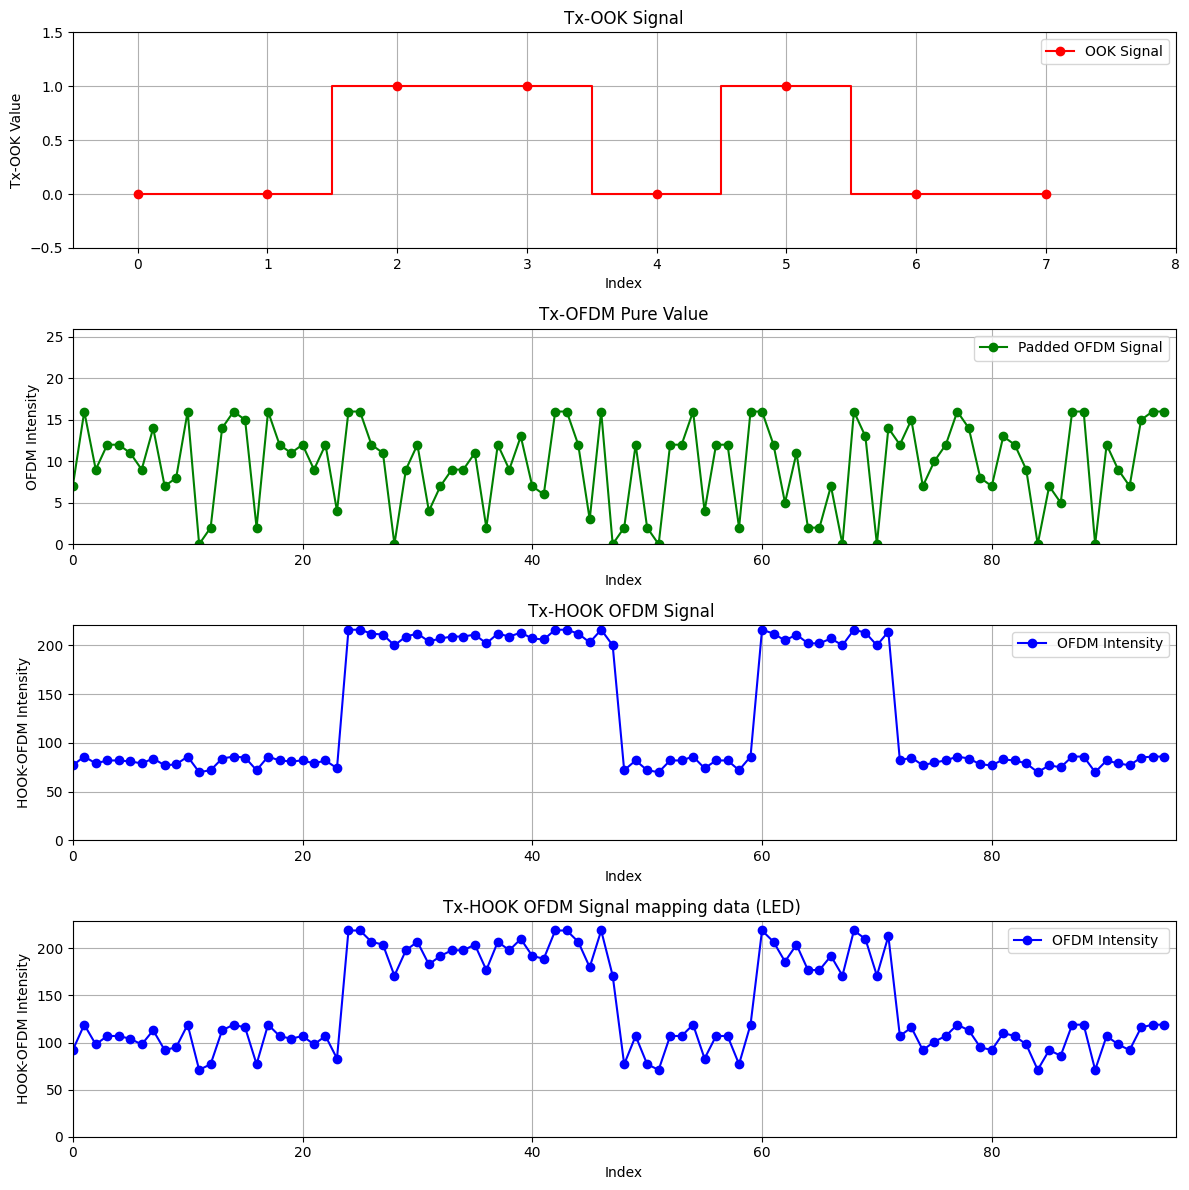

In [81]:
# #Plotting Data in 1st mapping
plt.figure(figsize=(12, 12))

# Subplot 1: OOK Signal
plt.subplot(4, 1, 1)
plt.step(range(len(OOK_signal)), OOK_signal, where='mid', linestyle='-', color='r', marker='o', label="OOK Signal")
plt.ylim(-0.5, 1.5)  # Limit y-axis to 0-1.5
plt.xlim(-0.5, len(OOK_signal))  # Data range
plt.xlabel('Index')
plt.ylabel('Tx-OOK Value')
plt.title('Tx-OOK Signal')
plt.grid(True)
plt.legend()

# Subplot 2: Padded OFDM Signal
plt.subplot(4, 1, 2)
plt.plot(Data_ofdm, marker='o', linestyle='-', color='g', label="Padded OFDM Signal")
plt.ylim(0, max(Data_ofdm) + 10)  # Adjust y-axis range dynamically
plt.xlim(0, len(Data_ofdm))  # Data range
plt.xlabel('Index')
plt.ylabel('OFDM Intensity')
plt.title('Tx-OFDM Pure Value')
plt.grid(True)
plt.legend()

# Subplot 3: OFDM Intensity 1st mapping
plt.subplot(4, 1, 3)
plt.plot(modified_OFDM, marker='o', linestyle='-', color='b', label="OFDM Intensity")
plt.ylim(0, max(modified_OFDM) + 5)  # Intensity range
plt.xlim(0, len(modified_OFDM))  # Data range
plt.xlabel('Index')
plt.ylabel('HOOK-OFDM Intensity')
plt.title('Tx-HOOK OFDM Signal ')
plt.grid(True)
plt.legend()

# Subplot 4: OFDM Intensity 2nd mapping (for real time implementation)
plt.subplot(4, 1, 4)
plt.plot(mapping_HOFDM, marker='o', linestyle='-', color='b', label="OFDM Intensity ")
plt.ylim(0, max(mapping_HOFDM) + 10)  # Intensity range
plt.xlim(0, len(mapping_HOFDM))  # Data range
plt.xlabel('Index')
plt.ylabel('HOOK-OFDM Intensity')
plt.title('Tx-HOOK OFDM Signal mapping data (LED) ')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()